In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import scipy
plt.close('all')
from matplotlib import rcParams, cycler

## Probability of dying

In [2]:
DATA_PATH = "data/life_table.csv"

# Import data

file = pd.read_csv(DATA_PATH)
data = pd.DataFrame(file, columns= ['Location', 'MidPeriod', 'Sex', 'AgeGrpStart', 'mx'])
data[['MidPeriod', 'AgeGrpStart', 'mx']] = data[['MidPeriod', 'AgeGrpStart', 'mx']].apply(pd.to_numeric)
data = data.loc[data['Sex'] == 'Total']
data[['MidPeriod']] = data[['MidPeriod']].subtract(3) #MidPeriod -> Start of the period
data.columns = ['Location', 'Time', 'Sex', 'AgeGrpStart', 'mx'] #rename column 'MidPeriod' -> 'Time'
data = data.replace(np.nan,1)

In [3]:
data_loc = data.loc[data['Location'] == 'Philippines']
data_loc = data_loc.loc[data_loc['Time'] <= 2020]

/home/louise/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


Text(0.5, 1.0, 'Philippines')

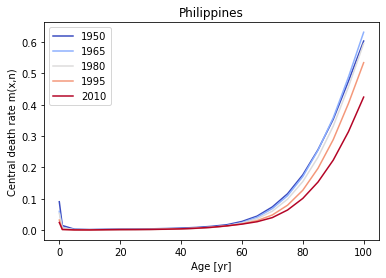

In [4]:
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(dates)/3))) 

for i in range (0,13):
    if (0 == np.mod(i,3)):
        data_loc_i = data_loc.loc[data_loc['Time'] == dates[i]]
        y = data_loc_i['mx']
        x = data_loc_i['AgeGrpStart']
        plt.plot(x, y, label=dates[i])
    
plt.xlabel('Age [yr]')
plt.ylabel('Central death rate m(x,n)')
plt.legend(loc ='upper left')
plt.title('Philippines')

In [16]:
fig.savefig('death_PH.png', dpi=100, bbox_inches = "tight")

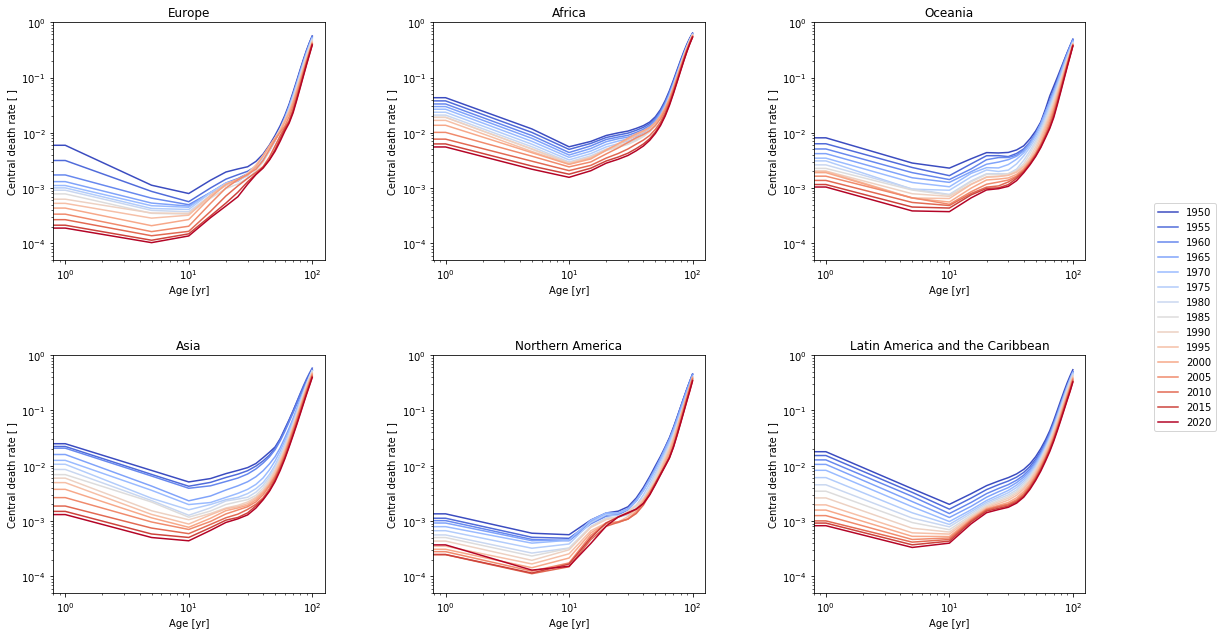

In [5]:
# Plot of all regions

regions = ['Europe', 'Africa', 'Oceania', 'Asia', 'Northern America', 'Latin America and the Caribbean'];
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(dates))))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_size_inches(18.5, 10.5)

for k in range(1, 7):
    ax = fig.add_subplot(2, 3, k)
    ax.set(title=regions[k-1], xlabel='Age [yr]', ylabel='Central death rate [ ]', ylim=[0.00005, 1])
    data_spec = data.loc[data['Location'] == regions[k-1]]
    data_spec = data_spec.loc[data_spec['Time'] <= 2020]
    for i in range (0,len(dates)):
        #if (0 == np.mod(i,3)):
            data_spec_i = data_spec.loc[data_spec['Time'] == dates[i]]
            y = data_spec_i['mx']
            x = data_spec_i['AgeGrpStart']
            ax.loglog(x, y, label=dates[i])

fig.legend(labels=dates, loc="center right")

## Creating input deaths

Text(0.5, 1.0, 'Philippines')

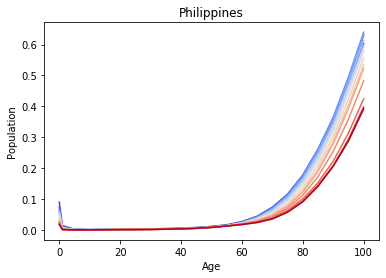

In [7]:
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(dates))))

data_file = pd.DataFrame()
ages = np.asarray(data_loc['AgeGrpStart'].drop_duplicates())
data_file['Age'] = ages

for i in range (0,len(dates)):
    samples = data_loc.loc[data_loc['Time'] == dates[i]]
    y = np.asarray(samples['mx'])
    x = np.asarray(samples['AgeGrpStart'])
    data_file[str(dates[i])] = y
    plt.plot(x, y, label=dates[i])
    
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Philippines')

In [26]:
data_file.to_csv("mx_PH.csv", index=False)

## Fitting mortality as a function of age

In [8]:
import scipy.stats
import scipy.optimize

from numpy import exp, linspace, random
from scipy.optimize import curve_fit

In [9]:
# Function computing a modified exponential
def Modif_exp(x, *args):
    k1, k2, m, s = args
    ret = k1*exp(x*m) + k2*exp(-x**2/s)
    return ret

Text(0.5, 1.0, 'Philippines')

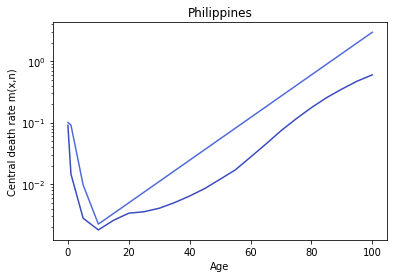

In [12]:
plt.figure()
data_loc_i = data_loc.loc[data_loc['Time'] == 1950]

y = data_loc_i['mx']
x = data_loc_i['AgeGrpStart']

plt.semilogy(x, y)
plt.semilogy(x, exp(0.08*(x-0))*0.001 + 0.1*exp(-(x)**2/10))
plt.xlabel('Age')
plt.ylabel('Central death rate m(x,n)')
plt.title('Philippines')

In [15]:
x = data_loc_i['AgeGrpStart']
y = data_loc_i['mx']

params = [0.08, 0.1, 0.001, 10] # shift, ..., amplitude

fitted_params,_ = scipy.optimize.curve_fit(Modif_exp, x, y, p0=params)
print('best_vals: {}'.format(fitted_params))

best_vals: [0.00095165 0.08952118 0.0649416  0.52996964]


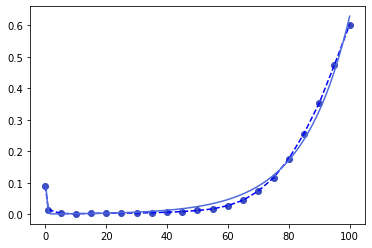

In [16]:
plt.plot(x, y, 'o')
xx = np.linspace(np.min(x), np.max(x), 1000)
plt.plot(x, y, 'b--', label='data')
plt.plot(xx, Modif_exp(xx, *fitted_params))
plt.show()